# Data Visualization

This notebook will be looking at and visually organizing the data from the merged spotify and tiktok dataset to better understand the distribution of spotify and tiktok song entries based on their features

In [ ]:
# import
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA

# Download dataset

In [ ]:
# import dataset
spotify_tiktok = pd.read_csv("spotify_tiktok.csv")

# Histogram representation of each feature


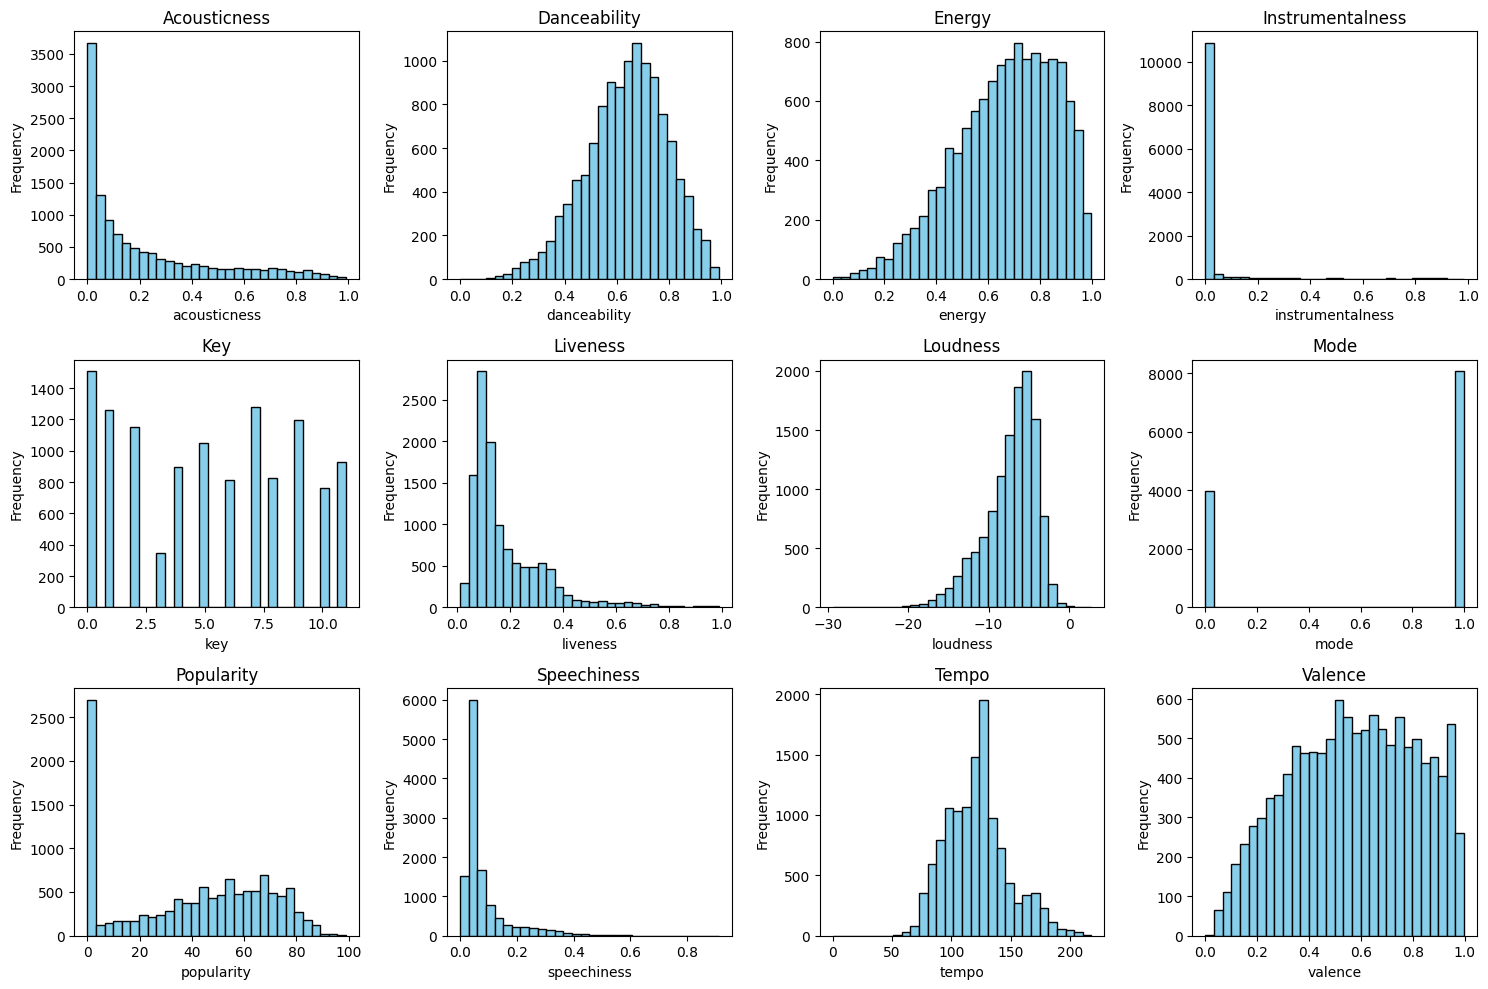

In [ ]:
# Select numerical columns for plotting
numerical_columns = ['acousticness', 'danceability', 'energy', 'instrumentalness',
                     'key', 'liveness', 'loudness', 'mode', 'popularity',
                     'speechiness', 'tempo', 'valence']

# Plot histograms for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, start=1):
    plt.subplot(3, 4, i)
    plt.hist(spotify_tiktok[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(col.capitalize())
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Pairplot representation of each feature

In [ ]:
import seaborn as sns

# Select numerical columns for plotting
numerical_columns = ['acousticness', 'danceability', 'energy', 'instrumentalness',
                     'key', 'liveness', 'loudness', 'mode', 'popularity',
                     'speechiness', 'tempo', 'valence']

# Create a pairplot
sns.pairplot(spotify_tiktok[numerical_columns], diag_kind='kde')
plt.show()


Output hidden; open in https://colab.research.google.com to view.

# Feature reduction and plotting

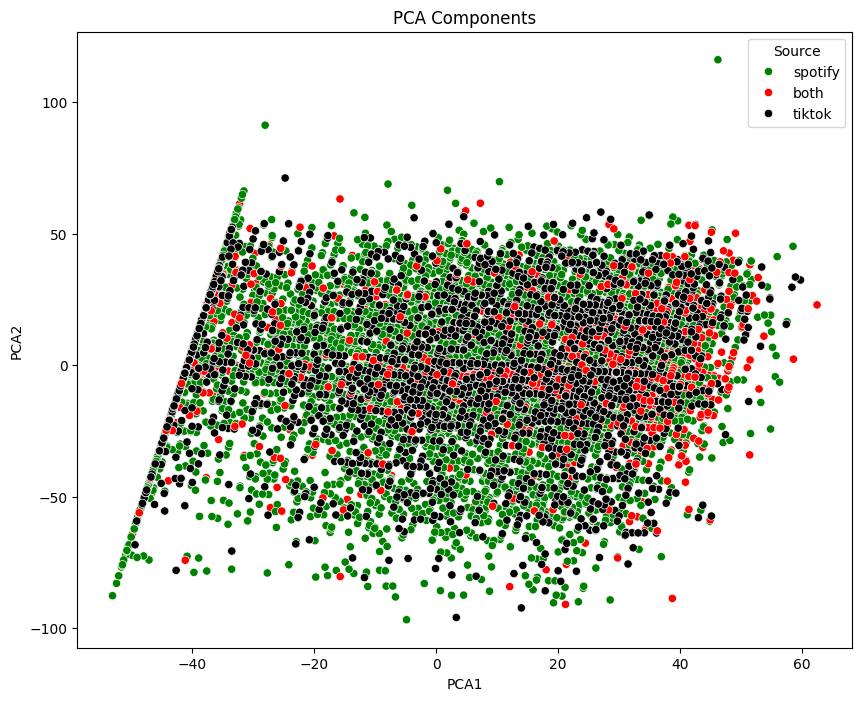

In [ ]:
# Combine the 'spotify' and 'tiktok' columns into a single 'source' column
spotify_tiktok['source'] = ''
spotify_tiktok.loc[spotify_tiktok['spotify'] & ~spotify_tiktok['tiktok'], 'source'] = 'spotify'
spotify_tiktok.loc[~spotify_tiktok['spotify'] & spotify_tiktok['tiktok'], 'source'] = 'tiktok'
spotify_tiktok.loc[spotify_tiktok['spotify'] & spotify_tiktok['tiktok'], 'source'] = 'both'

# Perform PCA
pca = PCA(n_components=2)
spotify_tiktok_pca = pca.fit_transform(spotify_tiktok[numerical_columns])

# Create a new DataFrame with the two PCA components
spotify_tiktok_pca_df = pd.DataFrame(data=spotify_tiktok_pca, columns=['PCA1', 'PCA2'])

# Add the 'source' column to the PCA DataFrame
spotify_tiktok_pca_df['source'] = spotify_tiktok['source']

# Plot the PCA components
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', data=spotify_tiktok_pca_df, hue='source', palette={'spotify': 'green', 'tiktok': 'black', 'both': 'red'})
plt.title('PCA Components')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Source', loc='upper right')
plt.show()

